In [1]:
from aiml import MLModels
from sklearn.preprocessing import MinMaxScaler

/home/edavid/repo/playground/ml/aiml/models.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Classification

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

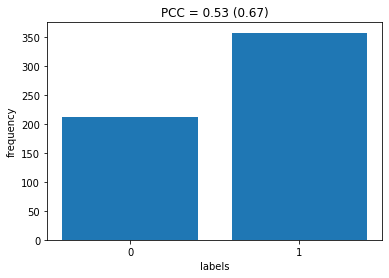

KNN



Logistic Regression (L1)



Logistic Regression (L2)



Linear SVM (L1)



Linear SVM (L2)


,Model,Accuracy,Best Parameter,Top Predictor
0,KNN,0.933566,n_neighbors = 8,N/A
1,Logistic Regression (L1),0.891608,C = 0.001,mean perimeter
2,Logistic Regression (L2),0.891608,C = 0.0001,mean perimeter
3,Linear SVM (L1),0.972028,C = 3,worst concave points
4,Linear SVM (L2),0.972028,C = 10,worst concave points


In [3]:
MLModels.random_state = 10510084 # should generate the same state so we can write tests
MLModels.n_trials = 2 # Change n_trials for all models, lazy to wait so setting this to a low value
m = MLModels.run_classifier(cancer.data, cancer.target, cancer.feature_names, n_neighbors=list(range(1,10)), methods='all')

In [4]:
MLModels.summarize(m, cancer.feature_names)

,Model,Accuracy,Best Parameter,Top Predictor
0,KNN,0.933566,n_neighbors = 8,N/A
1,Logistic Regression (L1),0.891608,C = 0.001,mean perimeter
2,Logistic Regression (L2),0.891608,C = 0.0001,mean perimeter
3,Linear SVM (L1),0.972028,C = 3,worst concave points
4,Linear SVM (L2),0.972028,C = 10,worst concave points


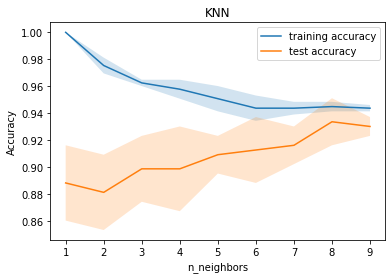

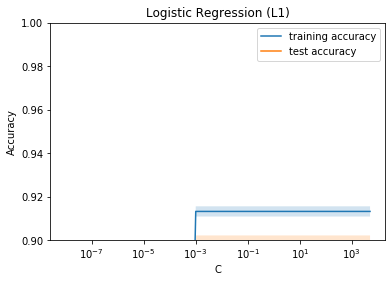

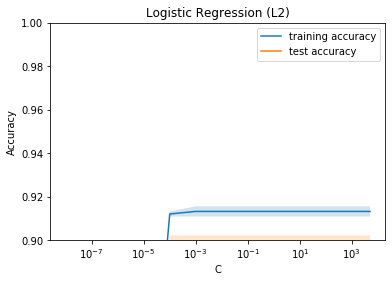

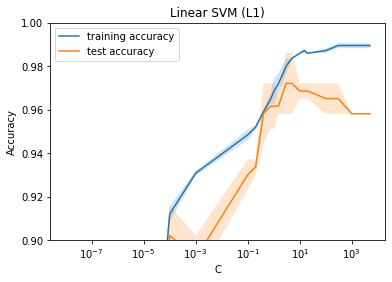

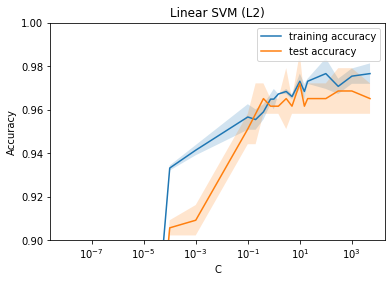

In [5]:
for k in m:
    ax = m[k].plot_accuracy()
    ax.set_title(k)
    if 'Logistic' in k or 'Linear' in k:
        ax.set_ylim(0.9, 1)
        ax.set_xscale('log')

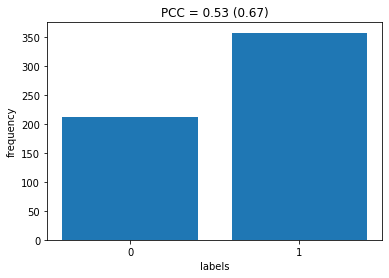

KNN


,Model,Accuracy,Best Parameter,Top Predictor
0,KNN,0.933566,n_neighbors = 8,N/A


In [6]:
m = MLModels.run_classifier(cancer.data, cancer.target, cancer.feature_names, n_neighbors=list(range(1,10)), methods='knn')

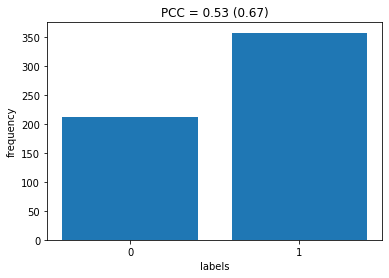

Logistic Regression (L1)



Logistic Regression (L2)


,Model,Accuracy,Best Parameter,Top Predictor
0,Logistic Regression (L1),0.891608,C = 0.001,mean perimeter
1,Logistic Regression (L2),0.891608,C = 0.0001,mean perimeter


In [7]:
m = MLModels.run_classifier(cancer.data, cancer.target, cancer.feature_names, n_neighbors=list(range(1,10)), methods='lr')

### Scaling the data

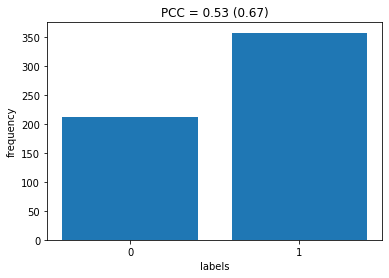

KNN



Logistic Regression (L1)



Logistic Regression (L2)



Linear SVM (L1)



Linear SVM (L2)


,Model,Accuracy,Best Parameter,Top Predictor
0,KNN,0.986014,n_neighbors = 3,N/A
1,Logistic Regression (L1),0.993007,C = 10,radius error
2,Logistic Regression (L2),0.989510,C = 10,radius error
3,Linear SVM (L1),0.993007,C = 1.5,worst area
4,Linear SVM (L2),0.986014,C = 0.4,radius error


In [8]:
MLModels.n_trials = 2
m = MLModels.run_classifier(cancer.data, cancer.target, cancer.feature_names, scaler=MinMaxScaler())

In [9]:
m['Logistic Regression (L1)'].coef

array([[-0.67679997, -3.0815833 , -0.71194007, -2.04960593,  0.        ,
         1.11703794, -3.76366799, -5.20794674, -0.06410807,  2.86138265,
        -6.27711515,  0.83642282, -4.00809753, -4.0427628 , -0.36162635,
         4.44694869,  0.24652146,  0.        ,  0.82182531,  2.0966413 ,
        -4.73078067, -4.58696643, -3.73928324, -4.40144621, -3.17039747,
         0.        , -3.49500429, -5.02064634, -4.6661586 , -0.18570049]])

## Regression

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()

In [11]:
MLModels.n_trials = 2

In [12]:
m = MLModels.run_regression(boston.data, boston.target, boston.feature_names, algorithm=['linear1'])

Linear Regression (L1)


,Model,Accuracy,Best Parameter,Top Predictor
0,Linear Regression (L1),0.678353,alpha = 0.001,NOX


In [13]:
m = MLModels.run_regression(boston.data, boston.target, boston.feature_names, algorithm=['linear2'])

Linear Regression (L2)


,Model,Accuracy,Best Parameter,Top Predictor
0,Linear Regression (L2),0.708417,alpha = 1e-12,NOX


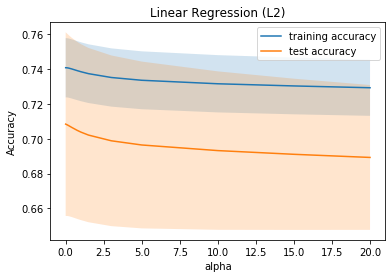

In [14]:
for k in m:
    ax = m[k].plot_accuracy()
    ax.set_title(k)

In [15]:
MLModels.summarize(m, boston.feature_names)

,Model,Accuracy,Best Parameter,Top Predictor
0,Linear Regression (L2),0.708417,alpha = 1e-12,NOX
